In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import os
import pandas as pd
from pathlib import Path
from hcmus.core import appconfig
from hcmus.lbs import LabelStudioConnector

2025-06-12 20:56:13.411 | INFO     | hcmus.core.appconfig:<module>:7 - Load DotEnv: True
/Volumes/Cucumber/Projects/item-identification/.venv/lib/python3.9/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


In [3]:
accepted_labels = """
8934804026817-nuoc-tuong-maggi-dau-nanh-thanh-diu-chai-700ml
8934804020402-nuoc-tuong-maggi-dau-nanh-dam-dac-700ml
8936048470524-mi-tom-3-mien-gold-vi-bo-ham-rau-thom-75g
8934822201272-bia-heineken-silver-lon-250ml
5054563022592-kem-danh-rang-sensodyne-giam-e-buotlam-sang-rang-100g
8934868166344-nuoc-rua-tay-lifebouy-450ml
8934707029182-hat-nem-knorr-thit-than-xuong-ong-va-tuy-900g
8934822361211-bia-heineken-khong-con-lon-330ml
8850006932346-kem-danh-rang-colgate-maxfresh-huong-tra-xanh-225g-+-ban-chai-long-to
8850006932322-kem-danh-rang-colgate-maxfresh-huong-bac-ha-225g-+-ban-chai-long-to
6920354827792-kem-danh-rang-colgate-maxfresh-tinh-chat-than-tre-225g-+-ban-chai-long-to
8936136163314-nuoc-mam-nam-ngu-3-trong-1-750ml
8934563198152-mi-hao-hao-chay-vi-rau-nam-74gr
8935049501503-nuoc-ngot-coca-cola-vi-nguyen-ban-lon-320ml
8936048470036-mi-3-mien-mi-chay-la-da-65g-(goi)
8935001215028-tra-tea-break-milk-350ml
8935006532755-kem-rua-mat-acnes-vitamin-lam-sang-da,-mo-seo-tham-50g
8935018801641-khan-bep-da-nang-pulppy-classic-2-lop-loc-2-cuon
8935024123287-ca-phe-sua-hoa-tan-g7-3in1-hop-336g-(16g-x-21-goi)
8935006538634-dau-tay-trang-hada-labo-sach-sau-duong-am-toi-uu-200ml
8934840000093-nuoc-khoang-chanh-lemona-chai-500ml
8997035601321-nuoc-uong-bu-dien-giai-bo-sung-ion-pocari-sweat-chai-900ml
4897036693162-nuoc-tang-luc-monster-mango-loco-355ml
809939073648-soda-sua-huong-vi-chuoi-milkis-banana
8934804038131-tra-hoa-qua-nestea-hoa-tan-hop-144g-12-goi-x-12g
8936048471248-mi-tom-chua-cay-dac-biet-3-mien-gold-goi-75g
8934804027333-tra-chanh-nestea-hoa-tan-hop-195g-15-goi-x-13g
8936010530881-tra-chanh-cozy-hoa-tan-hop-240g-16-goi-x-15g
8935049510604-nuoc-ngot-sprite-chai-320ml
8934588672118-nuoc-ngot-pepsi-khong-calo-vi-chanh-320ml
8935049501572-nuoc-ngot-fanta-vi-cam-lon-320ml
8935049500445-nuoc-ngot-fanta-chai-1.5l
8936721790017-nuoc-loc-th-true-water-chai-500ml
8935049501718-nuoc-ngot-sprite-lon-320ml
8936193070013-tra-xanh-khong-do-500ml
8935137601122-tra-xanh-thai-nguyen-100g
8934564600883-tra-den-c2-vi-dua-luoi-chai-455ml
8935001214274-tra-bi-dao-wonderfarm-lon-310ml
8934588870552-tra-olong-teaplus-450ml
6920354836930-kem-danh-rang-colgate-optic-white-cong-nghe-sac-tim-100g
8935049501374-nuoc-ngot-cocacola-vi-nguyen-ban-chai-600ml
8935039570700-ca-phe-sua-robusta-birdy-lon-170ml
8934673701402-nuoc-dao-necta-vinamilk-hop-1l
8935005801012-nuoc-loc-lavie-chai-1-5l
8936079140021-ca-phe-sua-highland-coffee-lon-185ml
8934588640445-ca-phe-sua-boss-lon-180ml
8934683008614-ca-phe-sua-vinacafe-3-in-1-gold-tui-480g-24-goi-tui
8934683008867-nuoc-tang-luc-wake-up-247-vi-ca-phe-330ml
8935328600156-tra-xanh-tui-loc-phuc-long-2g-x-hop-25-goi
4902430805322-nuoc-rua-tay-diet-khuan-safeguard-trang-tinh-khiet-450ml
8936156730718-nuoc-xa-vai-blue-dam-dac-huong-thanh-xuan-tui-3.2l
8934868166825-dau-goi-sunsilk-natural-duong-ngan-gay-rung-650g
8934804040523-tra-vai-va-huong-hoa-lai-nestea-hoa-tan-hop-144g-12-goi-x-12g
8934822801335-bia-tiger-crystal-4-6-phan-tram-lon-330ml
8934868156871-dau-xa-sunsilk-mem-muot-dieu-ky-320g
8936010530713-tra-dao-cozy-hoa-tan-hop-16-goi-x-15g
8934868171850-nuoc-lau-kinh-sunlight-sieu-nhanh-sach-trong-suot-chai-520ml
8850228003541-nuoc-tang-luc-warrior-huong-dau-chai-330ml
8936193070075-nuoc-tang-luc-number-1-chai-330ml
8934588012112-nuoc-ngot-pepsi-cola-320ml
8936013254951-nuoc-rua-kinh-gift-540ml
8934868190394-nuoc-giat-comfort-huong-hoa-anh-dao-va-dao-tuoi-tui-3kg
3068320055008-nuoc-loc-evivan-chai-500ml
8936127794206-nuoc-uong-sua-trai-cay-th-true-juice-milk-huong-viet-quat-300ml
8935049511038-sua-trai-cay-nutriboost-cam-chai-1l
8934673573399-sua-tuoi-tiet-trung-co-duong,-100%-sua-tuoivinamilk-(1lit).
3760128640607-sua-tuoi-tiet-trung-promess-nguyen-kem-hop-1l
8934822212339-bia-heineken-lon-cao-330ml
8801382123446-nuoc-gao-han-quoc-loai-500ml
8936036201604-bia-hoegaarden-rosee-chai-248ml
8934692090013-bia-1664-blanc-5%-abv-chai-330ml
8934868166870-dau-goi-sunsilk-ong-muot-rang-ngoi-chai-650g
8934588233074-nuoc-tang-luc-sting-vi-dau-tay-do-330ml
8934822431211-bia-tiger-soju-infused-lager-wonder-melon-vi-dua-luoi-lon-330ml
8934822112332-bia-tiger-lon-cao-330ml-lon
8934868180470-dau-goi-dove-biotin-ngan-gay-rung-toc-880g
8935024170519-ca-phe-trung-nguyen-legend-classic-hop-357g-17g-x-21-goi
8934868166351-nuoc-rua-tay-lifebuoy-matcha-va-lo-hoichai-450g
8936191270057-ca-phe-cappuccino-dua-just-viet-hop-hop-10-goi-x-17g
8934868166924-dau-goi-sunsilk-mem-muot-dieu-ky-chai-650g
8934804028064-ca-phe-hoa-tan-nescafe-3in1-vi-nguyen-ban-tui-782g-(17g-x-46-goi)
8936122200276-ca-phe-mr.brown-blue-mountain-240ml
8934563122201-mi-hao-hao-vi-tom-chua-cay-goi-100g
8935136865709-sua-tam-purite-duong-da-mem-min-huong-hoa-hong-rose-chai-850ml
8934822451295-nuoc-trai-cay-len-men-strongbow-vi-thom-luu-3.5%-lon-330ml
8934868170990-nuoc-rua-tay-lifebuoy-vitamin-sua-duong-am-tui-1kg
8936094291005-bia-budweiser-5-lon-330ml
8934822121297-nuoc-trai-cay-len-men-strongbow-red-beries-4.5%-abv-lon-320ml
8934822111298-nuoc-trai-cay-len-men-strongbow-gold-apple-4-5-abv-lon-320ml
8935049501190-nuoc-tra-fuze-tea-vi-chanh-sa-450ml
8936199810026-cafe-the-coffee-house-sua-da-22gx10-goi-(hop)
8888589308920-tra-bi-dao-winter-melon-jj-lon-300ml
8934673101097-sua-tuoi-tiet-trung-tiet-trung-vinamilk-khong-duong-bich-220ml
8934563183158-mi-hao-hao-sa-te-hanh-tim-75g
8936048470012-mi-3-mien-tom-chua-cay-65g
8934683009925-ca-phe-sua-da-vinacafe-chat-hop-10-goi-24g
8850228007617-nuoc-tang-luc-redbull-250ml
8934563651138-mi-hao-hao,-vi-tom-chua-cayacecook,-coc-(67g)
8934588063060-nuoc-loc-aquafina-chai-1-5l
8935049510857-nuoc-loc-dasani-chai-1.5l"""
accepted_labels = accepted_labels.splitlines()
accepted_labels = [x for x in accepted_labels if len(x) > 0]

In [4]:
lsb_connector = LabelStudioConnector(
    url=appconfig.LABEL_STUDIO_URL,
    api_key=appconfig.LABEL_STUDIO_API_KEY,
    project_id=appconfig.LABEL_STUDIO_PROJECT_MAPPING["train"],
    temp_dir=appconfig.LABEL_STUDIO_TEMP_DIR
)

In [5]:
splits = {}
for split_name in ["train", "test", "val"]:
    lsb_connector = LabelStudioConnector(
        url=appconfig.LABEL_STUDIO_URL,
        api_key=appconfig.LABEL_STUDIO_API_KEY,
        project_id=appconfig.LABEL_STUDIO_PROJECT_MAPPING[split_name],
        temp_dir=appconfig.LABEL_STUDIO_TEMP_DIR
    )

    tasks = lsb_connector.get_tasks()
    labels = lsb_connector.extract_labels(tasks)
    dataset = lsb_connector.download_dataset(tasks, labels)
    dataset = lsb_connector.transform_labels(dataset, labels, accepted_labels)
    splits[split_name] = dataset

2025-06-12 20:56:14.137 | WARNING  | hcmus.lbs._label_studio_connector:get_tasks:144 - Page size is too large, only 3223 tasks available.
2025-06-12 20:56:14.138 | INFO     | hcmus.lbs._label_studio_connector:get_tasks:148 - New `page_to` applied: 33
Loading tasks: 100%|██████████| 33/33 [00:09<00:00,  3.55it/s]
2025-06-12 20:56:28.266 | WARNING  | hcmus.lbs._label_studio_connector:get_tasks:144 - Page size is too large, only 378 tasks available.
2025-06-12 20:56:28.266 | INFO     | hcmus.lbs._label_studio_connector:get_tasks:148 - New `page_to` applied: 4
Loading tasks: 100%|██████████| 4/4 [00:02<00:00,  1.68it/s]
2025-06-12 20:56:31.062 | WARNING  | hcmus.lbs._label_studio_connector:get_tasks:144 - Page size is too large, only 30 tasks available.
2025-06-12 20:56:31.063 | INFO     | hcmus.lbs._label_studio_connector:get_tasks:148 - New `page_to` applied: 1
Loading tasks: 100%|██████████| 1/1 [00:00<00:00,  6.74it/s]


In [6]:
import torch
import torch.nn as nn
import torchvision.transforms as transforms
import timm
from loguru import logger
from torch.utils.data import DataLoader
from tqdm import tqdm
from hcmus.data import CroppedObjectClassificationDataset

/Volumes/Cucumber/Projects/item-identification/.venv/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [7]:
common_transforms = transforms.Compose([
    transforms.Resize((256, 256)),
    # transforms.RandomCrop(size=(224, 224)),

    # transforms.RandomResizedCrop(
    #     size=(224, 224),
    #     scale=(0.8, 1.0),
    #     ratio=(0.9, 1.1)
    # ),

    # Randomly change brightness, contrast, saturation, and hue
    transforms.ColorJitter(brightness=0.2, contrast=0.2, saturation=0.2, hue=0.1),

    # Random horizontal and vertical flip
    transforms.RandomHorizontalFlip(p=0.5),
    # transforms.RandomVerticalFlip(p=1),

    # Random rotation within ±30 degrees
    transforms.RandomRotation(degrees=90),

    # Random affine transformation (rotation, translation, scale, shear)
    transforms.RandomAffine(
        degrees=15,          # additional rotation control
        translate=(0.1, 0.1),  # 5% translation in both directions
        scale=(0.8, 1.1),    # zoom in/out
        shear=20             # shear angle
    ),

    # Random perspective transformation
    transforms.RandomPerspective(distortion_scale=0.2, p=0.5),
    transforms.RandAugment(num_ops=2, magnitude=9),
    transforms.ToTensor(),
    transforms.Normalize(
        mean=[0.485, 0.456, 0.406],
        std=[0.229, 0.224, 0.225]
    )
])

transform_val = transforms.Compose([
    transforms.Resize((256, 256)),
    transforms.ToTensor(),
    transforms.Normalize(
        mean=[0.485, 0.456, 0.406],
        std=[0.229, 0.224, 0.225]
    )
])

In [8]:
labels = []
for x in splits["train"]:
    labels.extend(x.get("target").get("labels"))
labels = set(labels)
len(labels)

100

In [9]:
BATCH_SIZE = 32
EPOCHS = 128
DEVICE = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
MODEL_NAMES = [
    'densenet121'
]
# NUM_CLASSES = len(accepted_labels) + 1
train_dataset = CroppedObjectClassificationDataset(splits["train"], transforms=common_transforms, skip_labels=["object"])
val_dataset = CroppedObjectClassificationDataset(splits["val"], label2idx=train_dataset.label2idx, transforms=transform_val, skip_labels=["object"])
train_loader = DataLoader(train_dataset, batch_size=BATCH_SIZE, shuffle=True, num_workers=2)
val_loader = DataLoader(val_dataset, batch_size=BATCH_SIZE, shuffle=False, num_workers=2)
NUM_CLASSES = len(train_dataset.label2idx)
print(NUM_CLASSES)

2025-06-12 20:56:32.029 | INFO     | hcmus.data._torch_dataset:__init__:88 - Auto infer `label2idx` mapping, mapping length: 99.


99


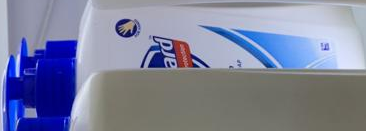

In [10]:
from PIL import Image, ImageOps
sample = train_dataset.samples[17]
img_path = sample['image']
box = sample['box']
label = sample['label']
image = Image.open(img_path)
image = ImageOps.exif_transpose(image)
x1, y1, x2, y2 = map(int, box)
cropped = image.crop((x1, y1, x2, y2))
cropped

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-2.117904..1.9254032].


(256, 256, 3)


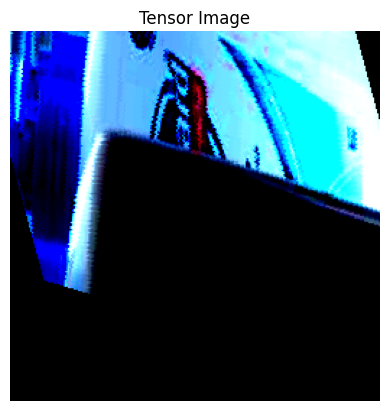

In [11]:
import torch
import matplotlib.pyplot as plt
import numpy as np

image_ts, _ = train_dataset[17]
image_np = image_ts.permute(1, 2, 0).numpy()
print(image_np.shape)
# Plot it
plt.imshow(image_np)
plt.axis('off')
plt.title("Tensor Image")
plt.show()

In [12]:
import mlflow
experiment_name = "/Classifier"
experiment = mlflow.get_experiment_by_name(experiment_name)
experiment_id = None
if not experiment:
    experiment_id = mlflow.create_experiment(experiment_name)
else:
    experiment_id = experiment.experiment_id

In [ ]:
def cutmix(images, labels, alpha=1.0, prob=0.5):
    """
    Apply CutMix augmentation to a batch of images and labels.

    Args:
        images: Batch of images [batch_size, channels, height, width]
        labels: Batch of labels [batch_size]
        alpha: Parameter for beta distribution (default: 1.0)
        prob: Probability of applying CutMix (default: 0.5)

    Returns:
        Mixed images and target dictionary for loss calculation
    """
    if np.random.rand() > prob:
        return images, labels

    batch_size = images.size(0)

    # Sample lambda from beta distribution
    lam = np.random.beta(alpha, alpha)

    # Get random permutation of indices
    rand_index = torch.randperm(batch_size).to(images.device)

    # Get target labels
    target_a = labels
    target_b = labels[rand_index]

    # Get bounding box coordinates
    H, W = images.size(2), images.size(3)
    cut_rat = np.sqrt(1. - lam)
    cut_w = int(W * cut_rat)
    cut_h = int(H * cut_rat)

    # Get random center point
    cx = np.random.randint(W)
    cy = np.random.randint(H)

    # Get bounding box coordinates
    bbx1 = np.clip(cx - cut_w // 2, 0, W)
    bby1 = np.clip(cy - cut_h // 2, 0, H)
    bbx2 = np.clip(cx + cut_w // 2, 0, W)
    bby2 = np.clip(cy + cut_h // 2, 0, H)

    # Apply CutMix
    mixed_images = images.clone()
    mixed_images[:, :, bby1:bby2, bbx1:bbx2] = images[rand_index, :, bby1:bby2, bbx1:bbx2]

    # Adjust lambda based on actual cut region
    lam = 1 - ((bbx2 - bbx1) * (bby2 - bby1) / (H * W))

    return mixed_images, {'target_a': target_a, 'target_b': target_b, 'lam': lam}

def cutmix_criterion(outputs, targets, criterion):
    """
    Calculate loss for CutMix augmented data.

    Args:
        outputs: Model predictions
        targets: Dictionary containing target_a, target_b, and lambda
        criterion: Loss function (e.g., CrossEntropyLoss)

    Returns:
        Mixed loss value
    """
    if isinstance(targets, dict):
        # CutMix targets
        target_a, target_b, lam = targets['target_a'], targets['target_b'], targets['lam']
        loss = lam * criterion(outputs, target_a) + (1 - lam) * criterion(outputs, target_b)
        return loss
    else:
        # Regular targets
        return criterion(outputs, targets)

def calculate_accuracy_cutmix(outputs, targets):
    """
    Calculate accuracy for CutMix augmented data.

    Args:
        outputs: Model predictions
        targets: Dictionary containing target_a, target_b, and lambda OR regular labels

    Returns:
        Number of correct predictions and total predictions
    """
    _, predicted = outputs.max(1)

    if isinstance(targets, dict):
        # CutMix targets - use the dominant label for accuracy calculation
        target_a, target_b, lam = targets['target_a'], targets['target_b'], targets['lam']
        # Use the label with higher weight
        primary_target = target_a if lam >= 0.5 else target_b
        correct = predicted.eq(primary_target).sum().item()
        total = primary_target.size(0)
    else:
        # Regular targets
        correct = predicted.eq(targets).sum().item()
        total = targets.size(0)

    return correct, total

# Modified training function with CutMix
def train_model(model, criterion, optimizer, cutmix_alpha=1.0, cutmix_prob=0.5):
    model.train()
    total_loss, correct, total = 0, 0, 0

    for images, labels in tqdm(train_loader, desc="Training", leave=False):
        images, labels = images.to(DEVICE), labels.to(DEVICE)

        # Apply CutMix augmentation
        images, targets = cutmix(images, labels, alpha=cutmix_alpha, prob=cutmix_prob)

        optimizer.zero_grad()
        outputs = model(images)

        # Calculate loss with CutMix support
        loss = cutmix_criterion(outputs, targets, criterion)

        loss.backward()
        optimizer.step()

        total_loss += loss.item() * images.size(0)

        # Calculate accuracy
        batch_correct, batch_total = calculate_accuracy_cutmix(outputs, targets)
        correct += batch_correct
        total += batch_total

    return total_loss / total, 100. * correct / total

# Evaluation function remains the same
def evaluate_model(model):
    model.eval()
    correct, total = 0, 0
    with torch.no_grad():
        for images, labels in tqdm(val_loader, desc="Evaluating", leave=False):
            images, labels = images.to(DEVICE), labels.to(DEVICE)
            outputs = model(images)
            _, predicted = outputs.max(1)
            total += labels.size(0)
            correct += predicted.eq(labels).sum().item()
    return 100. * correct / total

# Freeze backbone parameters
def freeze_backbone(model):
    for param in model.parameters():
        param.requires_grad = False

# Build model with frozen backbone + classifier head
def build_feature_extractor(model_name):
    backbone = timm.create_model(model_name, pretrained=True, num_classes=0, global_pool='avg')
    freeze_backbone(backbone)
    model = nn.Sequential(
        backbone,
        nn.Linear(backbone.num_features, NUM_CLASSES)
    )
    return model.to(DEVICE)

# Main training loop with CutMix parameters
for model_name in MODEL_NAMES:
    with mlflow.start_run(experiment_id=experiment_id, run_name=f"{model_name}_cutmix"):
        import json
        with open("label2idx.json", "w") as f:
            json.dump(train_dataset.label2idx, f, indent=2)
        mlflow.log_artifact("label2idx.json")
        logger.info(f"\n🔍 Training with frozen backbone and CutMix: {model_name}")
        model = build_feature_extractor(model_name)
        criterion = nn.CrossEntropyLoss()
        optimizer = torch.optim.Adam(model[-1].parameters(), lr=1e-3)

        # CutMix hyperparameters
        cutmix_alpha = 1.0  # Beta distribution parameter
        cutmix_prob = 0.5   # Probability of applying CutMix

        # Log CutMix hyperparameters
        mlflow.log_params({
            "cutmix_alpha": cutmix_alpha,
            "cutmix_prob": cutmix_prob,
            "model_name": model_name
        })

        best_acc = 0
        for epoch in range(EPOCHS):
            logger.info(f"Epoch {epoch+1}/{EPOCHS}")

            # Train with CutMix
            train_loss, train_acc = train_model(
                model, criterion, optimizer,
                cutmix_alpha=cutmix_alpha,
                cutmix_prob=cutmix_prob
            )

            val_acc = evaluate_model(model)
            logger.info(f"Train Loss: {train_loss:.4f}, Train Acc: {train_acc:.2f}%, Val Acc: {val_acc:.2f}%")

            mlflow.log_metrics({
                "train_accuracy": train_acc,
                "train_loss": train_loss,
                "val_accuracy": val_acc
            }, step=epoch)

            if val_acc > best_acc:
                best_acc = val_acc
                mlflow.pytorch.log_model(model, "model")

        # Log best accuracy
        mlflow.log_metric("best_val_accuracy", best_acc)

2025-06-12 20:56:33.369 | INFO     | __main__:<module>:166 - 
🔍 Training with frozen backbone and CutMix: densenet121
2025-06-12 20:56:34.081 | INFO     | __main__:<module>:184 - Epoch 1/128
Training:   0%|          | 0/78 [00:00<?, ?it/s]/Volumes/Cucumber/Projects/item-identification/.venv/lib/python3.9/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(
/Volumes/Cucumber/Projects/item-identification/.venv/lib/python3.9/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(
Evaluating:   0%|          | 0/6 [00:00<?, ?it/s]        /Volumes/Cucumber/Projects/item-identification/.venv/lib/python3.9/site-packages/urllib3/__init__.py:35: NotOpen

In [ ]:
images, labels = next(iter(val_loader))
images, labels = images.to(DEVICE), labels.to(DEVICE)
outputs = model(images)

/Volumes/Cucumber/Projects/item-identification/.venv/lib/python3.9/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(
/Volumes/Cucumber/Projects/item-identification/.venv/lib/python3.9/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


In [ ]:
model.eval()
correct, total = 0, 0
with torch.no_grad():
    for images, labels in tqdm(val_loader, desc="Evaluating", leave=False):
        images, labels = images.to(DEVICE), labels.to(DEVICE)
        outputs = model(images)
        _, predicted = outputs.max(1)
        total += labels.size(0)
        correct += predicted.eq(labels).sum().item()